## ***Importing Libraries***

In [32]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import re

## ***Importing Datasets***

In [14]:
df=pd.read_excel("D://Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
10794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## ***Data Inspection***

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10799 entries, 0 to 10798
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Date_of_Journey  10683 non-null  object 
 2   Source           10683 non-null  object 
 3   Destination      10683 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10683 non-null  object 
 6   Arrival_Time     10683 non-null  object 
 7   Duration         10683 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10683 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 928.2+ KB


In [18]:
df.shape

(10799, 11)

In [20]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [22]:
df.isnull().sum()

Airline            116
Date_of_Journey    116
Source             116
Destination        116
Route              117
Dep_Time           116
Arrival_Time       116
Duration           116
Total_Stops        117
Additional_Info    116
Price              116
dtype: int64

In [24]:
df.duplicated().sum()

335

In [26]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### ***Number of Flights by Stoppages:***

#### *Counting the number of Stoppages*

In [28]:
no_of_flights= df["Total_Stops"].value_counts()
no_of_flights

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

#### *Visualising Number_of_flights by using Barplot*

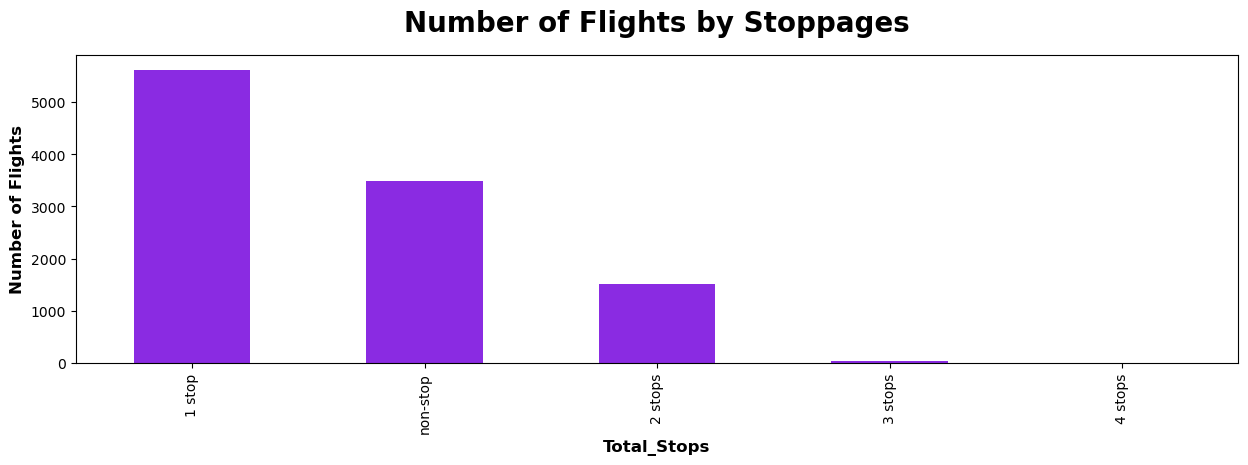

In [34]:
plt.figure(figsize=(15, 4))
no_of_flights.plot(kind="bar",color="blueviolet")
plt.title("Number of Flights by Stoppages",fontsize=20,fontweight="bold",y=1.05)
plt.xlabel("Total_Stops", fontsize=12,fontweight="bold")
plt.ylabel("Number of Flights", fontsize=12,fontweight="bold")
plt.show()

#### *Explanation*

* Using .value_counts() built-in method 
* It returns the count of unique values in a column and it is basically used for categorical variable to understand the frequency.
* From graph we come to know that there are four categories: 1 stop,non-stop,2 stop,3 stops,4 stops
* The 1 stop category has the highest number of flights exceeding 5000.
* The non-stop category has second highest number of flights around 3500.
* The 2 stop category has approximately 1500 flights
* The 3 stop category has the lowest number of flights and 4 stops has no record.
### *The graph shows that most of the flights have either one stop or no stops at all .This means that people  generally prefer flights with fewer stops*

## ***Most Expensive and Cheapest Flights:***

#### *Finding Cheapest Flights*

In [36]:
cheapest=df[df["Price"]==df["Price"].min()]
cheapest

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
4066,SpiceJet,21/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 22 Mar,1h 25m,non-stop,No info,1759.0
4274,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 28 Mar,1h 25m,non-stop,No info,1759.0
4839,SpiceJet,3/04/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 02 Apr,1h 30m,non-stop,No info,1759.0
10567,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,05:45,07:05,1h 20m,non-stop,No info,1759.0


#### *Finding Most Expensive Flights*

In [38]:
most_expensive=df[df["Price"]==df["Price"].max()]
most_expensive

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512.0


#### *Concatenating both Cheapest as well as Most Expensive Flights*

In [40]:
identify=pd.concat([cheapest,most_expensive])
identify=identify[["Airline","Price"]]
identify

,Airline,Price
4066,SpiceJet,1759.0
4274,SpiceJet,1759.0
4839,SpiceJet,1759.0
10567,SpiceJet,1759.0
2924,Jet Airways Business,79512.0


#### *Visualing which flight has cheap and expensive Price*

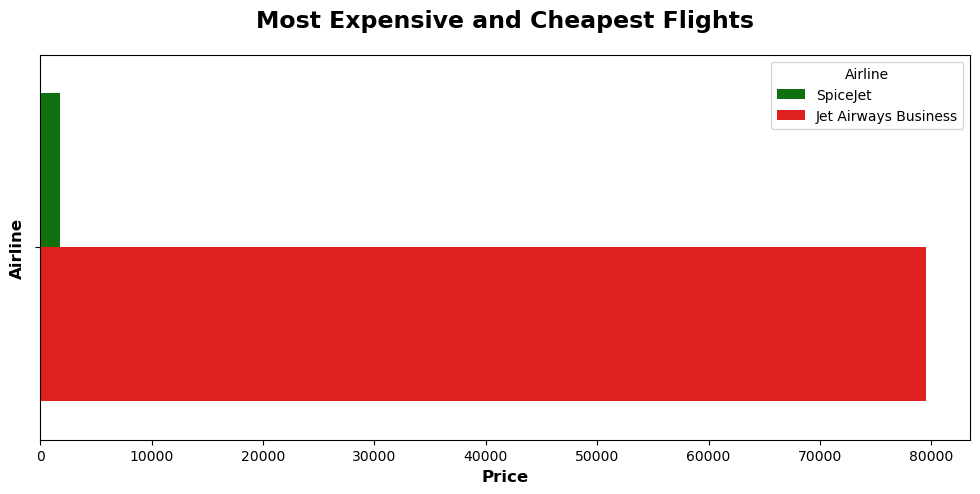

In [46]:
plt.figure(figsize=(12, 5))
sns.barplot(data=identify, x="Price", hue="Airline", palette=["green", "red"])
plt.title("Most Expensive and Cheapest Flights",fontsize=17,fontweight="bold",y=1.05)
plt.xlabel("Price", fontsize=12,fontweight="bold")
plt.ylabel("Airline", fontsize=12,fontweight="bold")
plt.show()

### *Explantion*

* Using min() to find the cheapest value flights by comparing the "Price" column. The results shows the four flight operated by SpiceJet with all same price 1759.0 The flights are from Mumbai to Hyderabad with different date of journey.
* Using max() to find the maximum value  flights by comparing the "Price" column. The results shows the one flight operated by Jet Airways Business	  with  price 79512.0.0 The flights are from Bangalore to New Delhi with different date of journey.
* Combines the code by using concat function to make a single dataframe.
### *It helps in analyzing the cheapest and expensive flight. The result from visualisation depicts Jet Airways Business is the most expensive with price 75512.0 and SpiceJet has lowest price with 1759.0*

## ***Variation of Flight Prices by Source:***

In [48]:
Variation=df.groupby("Source")[["Price"]].agg(["mean","median","min","max",lambda x:x.quantile(0.25),lambda y:y.quantile(0.75)])
Variation.rename(columns={"<lambda_0>":"Q1","<lambda_1>":"Q3"},inplace=True)
Variation

Price                                           
                  mean   median     min      max      Q1       Q3
Source                                                           
Banglore   8017.464269   6121.0  3257.0  79512.0  4544.0   8714.0
Chennai    4789.892388   3850.0  3145.0  19630.0  3597.0   5277.0
Delhi     10539.439057  10262.0  3876.0  52285.0  7202.0  13344.0
Kolkata    9158.389411   9345.0  3480.0  31945.0  5192.0  12681.0
Mumbai     5059.708752   3342.0  1759.0  25139.0  2647.0   5678.0

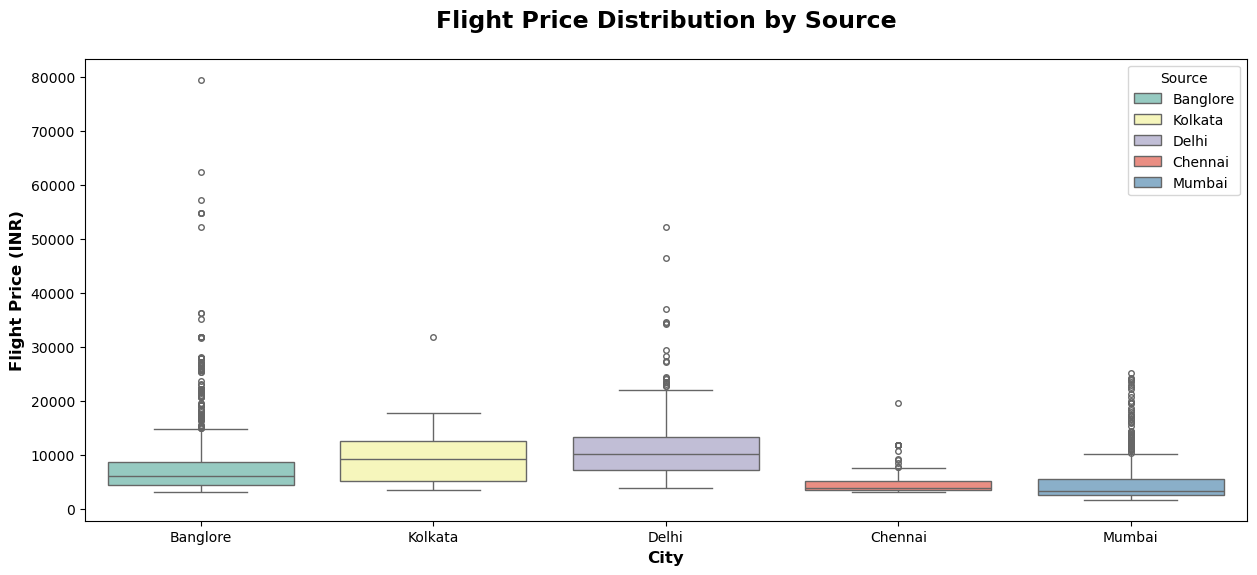

In [50]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x="Source",hue="Source", y="Price", palette="Set3", fliersize=4)
plt.title("Flight Price Distribution by Source", fontsize=17, fontweight="bold",y=1.05)
plt.xlabel("City", fontsize=12,fontweight="bold")
plt.ylabel("Flight Price (INR)", fontsize=12,fontweight="bold")
plt.show()

### *Explanation*

* The code groups the data by "Source" column (i.e City) and calculate the various statistics  for thr "Price" column such as mean, min, max, median and quantiles.
* The results are stored  in a new DataFrame called Variation.
* The code then creates a boxplot using sns.bosplot function from seaborn libraray which visualizes the distribution of flight prices for each city.
#### *These Insights can be useful for travelers, airlines, or travel agencies to understand the dynamics of flight prices in different cities and make informed decisions*

## ***Extracting Journey Day and Month:***

In [52]:
df["Date_of_Journey"]=pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y")
df["Date_of_Journey"]

0       2019-03-24
1       2019-05-01
2       2019-06-09
3       2019-05-12
4       2019-03-01
           ...    
10794          NaT
10795          NaT
10796          NaT
10797          NaT
10798          NaT
Name: Date_of_Journey, Length: 10799, dtype: datetime64[ns]

In [54]:
df["day_of_week"]=df["Date_of_Journey"].dt.day_name()
df["day_of_week"].head(2)

0       Sunday
1    Wednesday
Name: day_of_week, dtype: object

In [56]:
flight_by_week=df["day_of_week"].value_counts().sort_index()
flight_by_week

day_of_week
Friday        909
Monday       1850
Saturday     1670
Sunday       1474
Thursday     1832
Tuesday       869
Wednesday    2079
Name: count, dtype: int64

In [58]:
df["month"]=df["Date_of_Journey"].dt.month_name()
df["month"].head(2)

0    March
1      May
Name: month, dtype: object

In [60]:
flight_by_month=df["month"].value_counts().sort_index()
flight_by_month

month
April    1079
June     3414
March    2724
May      3466
Name: count, dtype: int64

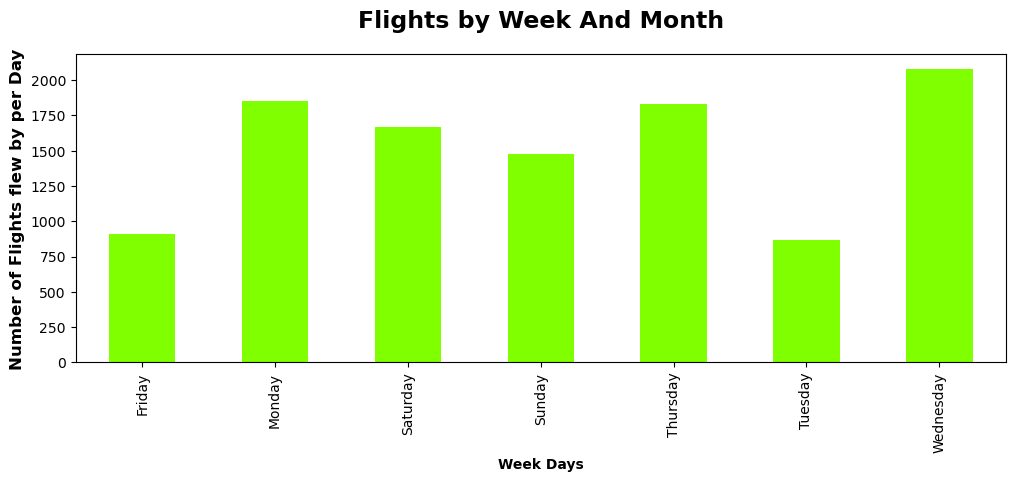

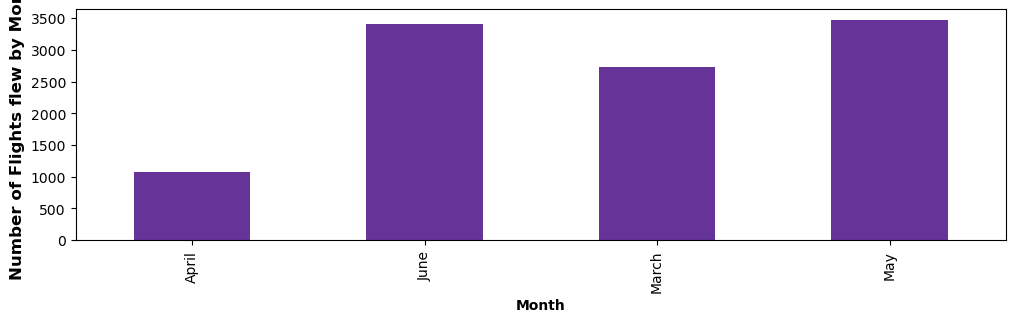

In [62]:
flight_by_week.plot(kind="bar", figsize=(12, 4), color="chartreuse")
plt.title("Flights by Week And Month",fontsize=17, fontweight="bold", y=1.06)
plt.xlabel("Week Days",fontsize=10,fontweight="bold")
plt.ylabel("Number of Flights flew by per Day",fontsize=12,fontweight="bold") 
plt.show()

flight_by_month.plot(kind="bar", figsize=(12, 3), color="rebeccapurple")
plt.xlabel("Month",fontsize=10,fontweight="bold")
plt.ylabel("Number of Flights flew by Month",fontsize=12,fontweight="bold") 
plt.show()

### *Explantion*
* 1. converted the "Date_of_Journey" column in datetime format.
* 2. Extracted  Day of week and month from the converted "Date_of_Journey" column and stored the in its own name called day_of_week  for day name and month for month name.
* 3. used .value_counts() to get the number of flights occur on each day of week amd in each month.
* 4. It creates two bar charts ,1st shows the number of flights by day of week, and the 2nd shows the number of flights by month.
### *The code and the visualization help to understand when the people travel the most which can be useful fo airlines, travel agencies and even airports to plan their operations and service better.*

## ***Day and Month with Maximum Stoppages:***

In [64]:
multi_stop_flights=df[df["Total_Stops"]!="non-stop"]

In [66]:
multi_stop_flights["Date_of_Journey"].dt.day_name()

1        Wednesday
2           Sunday
3           Sunday
4           Friday
6          Tuesday
           ...    
10794          NaN
10795          NaN
10796          NaN
10797          NaN
10798          NaN
Name: Date_of_Journey, Length: 7308, dtype: object

In [68]:
multi_stop_flights["day_of_week"]= multi_stop_flights["Date_of_Journey"].dt.day_name()
flight_by_day=multi_stop_flights["day_of_week"].value_counts()
flight_by_day

C:\Users\richa\AppData\Local\Temp\ipykernel_36740\1439951066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_stop_flights["day_of_week"]= multi_stop_flights["Date_of_Journey"].dt.day_name()


day_of_week
Wednesday    1531
Thursday     1386
Monday       1231
Saturday     1108
Sunday        954
Tuesday       580
Friday        402
Name: count, dtype: int64

In [70]:
multi_stop_flights["month"]= multi_stop_flights["Date_of_Journey"].dt.month_name()
flight_by_month=multi_stop_flights["month"].value_counts()
flight_by_month

C:\Users\richa\AppData\Local\Temp\ipykernel_36740\2392597375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_stop_flights["month"]= multi_stop_flights["Date_of_Journey"].dt.month_name()


month
May      2480
June     2384
March    1942
April     386
Name: count, dtype: int64

In [72]:
heatmap_data = multi_stop_flights.pivot_table(index="day_of_week",columns="month",values="Airline",aggfunc="count",fill_value=0)
heatmap_data

month,April,June,March,May
day_of_week,,,,
Friday,0,0,213,189
Monday,206,485,81,459
Saturday,50,461,199,398
Sunday,17,393,388,156
Thursday,0,651,344,391
Tuesday,62,0,120,398
Wednesday,51,394,597,489


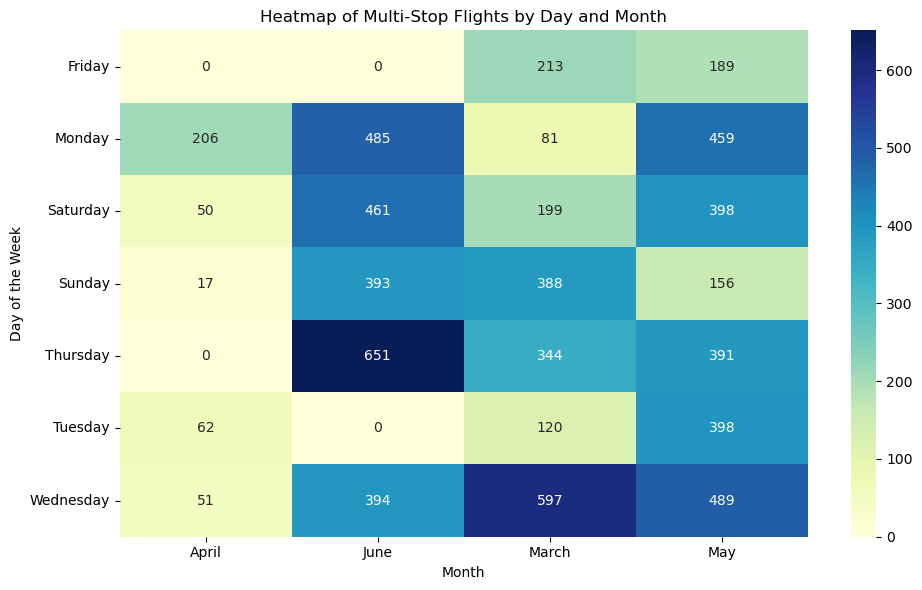

In [74]:
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu") 
#annot= If True then it write the data value in each cell.
#fmt= String formatting code to use when adding annotations. here "d" → integer
#".1f" → 1 decimal place float
#".2f" → 2 decimal places float
#"s" → string
#cmap=color"YlGnBu"-Yellow,green,blue
plt.title("Heatmap of Multi-Stop Flights by Day and Month")
plt.xlabel("Month")
plt.ylabel("Day of the Week")
plt.tight_layout() # adjusts the spacing between subplots to prevent overlapping content 
plt.show()


#### *Explanation*
* 1. Filters the flights with more than one stop from dataset and stored in the variable multi_stop_flights.
* 2. Extracted days and month from the filtered data [multi_stop_flights] by using the column Date_of_Journey and stored in the variable multi_stop_flights["day_of_week"] for weeks and for months multi_stop_flights["month"].
* 3. Counts the multi_stop_flights on each day and month and stored in variable called flight_by_day for the week days and flight_by_month for month name.
* 4. Generated the heatmap to visualize the distribution of multi-stop flights across different days and months using sns.heatmap().
### *It helps us to identify which days of the week have the most multi-sstop flights.*
####    *- It reveals the seasonal trends or fluctuations in  travel demand to inform strategic decisions.*
####    *- It also pinpoint a specific day-month combination with high-low frequencies of multi-stop flights.*                                                                                                                                        

## ***Flight Availability by Source and Destination:***

In [76]:
Flight_Availability=df.groupby(["Source","Destination"])[["Airline"]].count().rename(columns={"Airline":"Flight_Count"})
Flight_Availability

Flight_Count
Source   Destination              
Banglore Delhi                1265
         New Delhi             932
Chennai  Kolkata               381
Delhi    Cochin               4537
Kolkata  Banglore             2871
Mumbai   Hyderabad             697

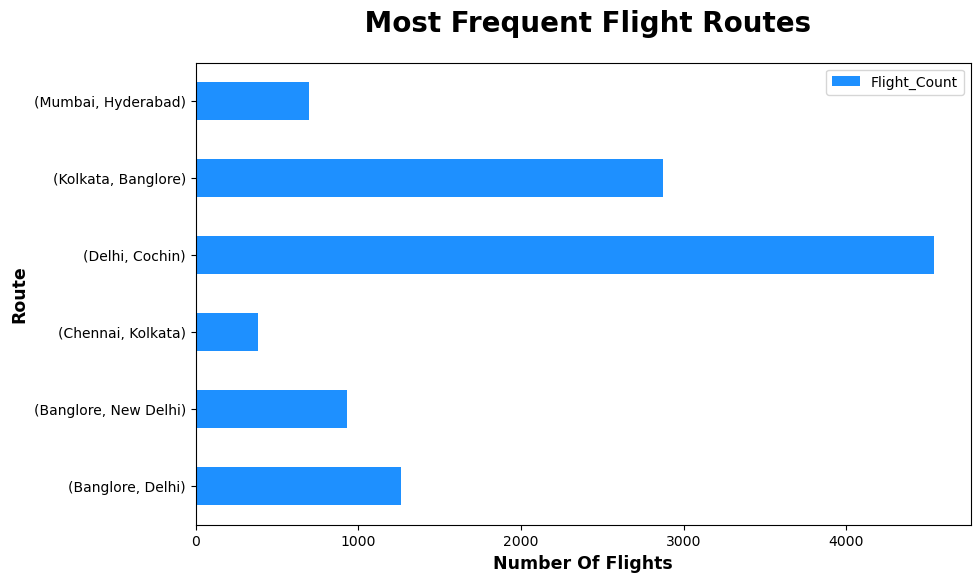

In [78]:
Flight_Availability.plot(kind="barh", figsize=(10, 6), color="dodgerblue")
plt.title(" Most Frequent Flight Routes",y=1.05,fontsize=20,fontweight="bold")
plt.xlabel("Number Of Flights",fontsize=12.5,fontweight="bold")
plt.ylabel("Route",fontsize=12.5,fontweight="bold")
plt.show()

### *Explantion*
* Group the data by "Source" and "Destination" and counts the number of flights for each route using groupby() and count() function and stored in variable Flight_Availability.
* Plot the horizontal bar plot to  visualize the most frequent route .
### *The Travelers can benefit from this data by identifying popular routes and planning their trips accordingly.*

## ***Average Price by Airline:***

In [80]:
avg_price_by_airline=df.groupby("Airline")[["Price"]].mean()
avg_price_by_airline

,Price
Airline,
Air Asia,5590.260188
Air India,9611.210616
GoAir,5861.056701
IndiGo,5673.682903
Jet Airways,11643.923357
Jet Airways Business,58358.666667
Multiple carriers,10902.678094
Multiple carriers Premium economy,11418.846154
SpiceJet,4338.284841


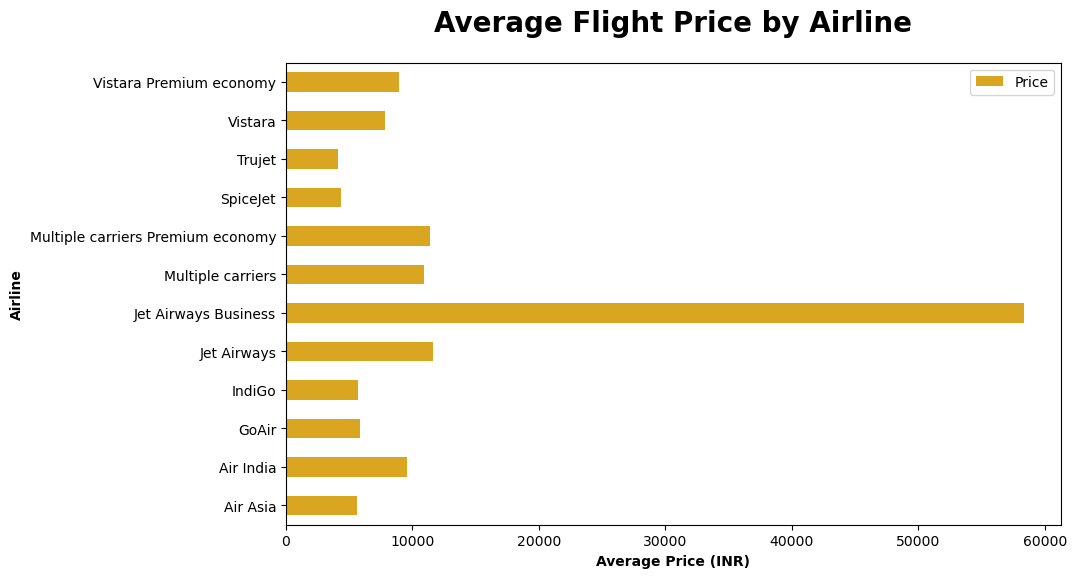

In [82]:
avg_price_by_airline.plot(kind="barh", figsize=(10, 6), color="goldenrod")
plt.title("Average Flight Price by Airline",y=1.05,fontsize=20,fontweight="bold")
plt.xlabel("Average Price (INR)",fontsize=10,fontweight="bold")
plt.ylabel("Airline",fontsize=10,fontweight="bold")
plt.show()

### *Explanation*
* Groups the data by "Airline" and "Price" to retreive the Airline with average Price and stored in the variable avg_price_by_airline.
* Plot the horizontal bar graph to analyze flight price. The chart provide a clear comparision of the average price across different airlines, allowing for easy identification of most expensive and affordable airlines.
### *This analysis can be useful for travelers looking to compare prices across airlines and make informed decisions about their flights bookings.*

## ***Flight Duration vs. Price:***

#### Converted duration column in minutes

In [84]:
hours_to_minute=df["Duration"].str.extract(r"(^[\d]+)h").astype(float).fillna(0)*60 
removed_m=df["Duration"].str.extract(r"(\d{1,2})m$").astype(float).fillna(0)
df["duration_minute"]=hours_to_minute+removed_m
df["duration_minute"]

0         170.0
1         445.0
2        1140.0
3         325.0
4         285.0
          ...  
10794       0.0
10795       0.0
10796       0.0
10797       0.0
10798       0.0
Name: duration_minute, Length: 10799, dtype: float64

In [86]:
correlation = df["duration_minute"].corr(df["Price"])
correlation

0.5063714821960479

#### Analyzing the relation between flight duration and price

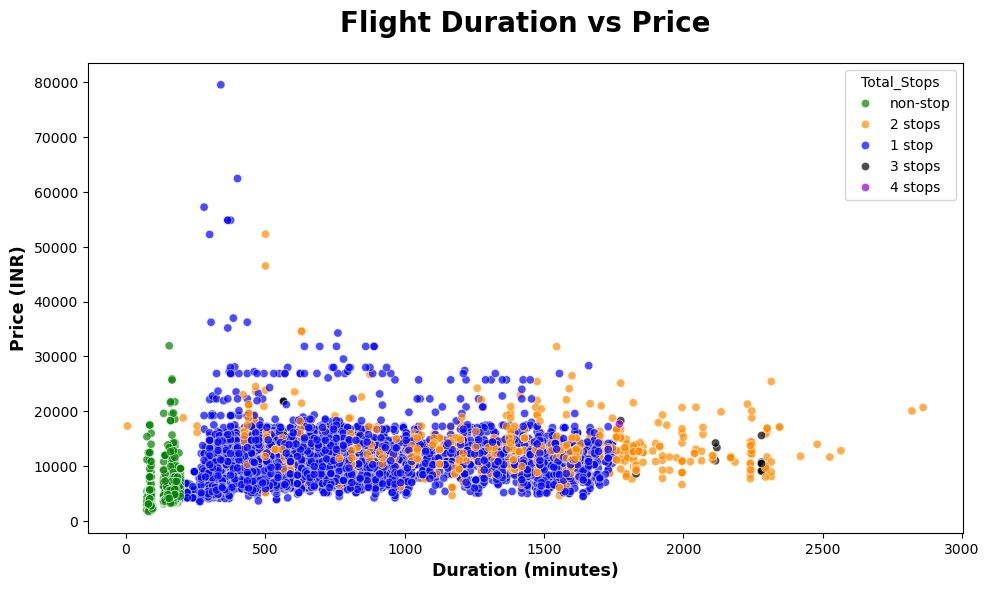

In [88]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="duration_minute", y="Price", hue="Total_Stops", alpha=0.7,palette=["green","darkorange","blue","black","darkviolet"])
plt.title("Flight Duration vs Price",y=1.05,fontsize=20, fontweight="bold")
plt.xlabel("Duration (minutes)",fontsize=12.5, fontweight="bold")
plt.ylabel("Price (INR)",fontsize=12.5, fontweight="bold")
plt.tight_layout()
plt.show()

### *Explanation*
* 1.Duration column is like ( 2h 30m) to convert the duration column in minute  used str.extract method .
* 2.Used regex pattern{ r"(^[\d]+)h"} to extract h which matches 1 or mored digits followed by "h" 
* 3.Similarly used regex pattern{(r"(\d{1,2})m$") to extract m which matches 1 or mored digits followed by "m"
* 4.After extracting, converted the values in float and fill the NaN value with 0 Then  multiplied by 60 to convert hours into minutes and stored in variable called hours_to_minute
* 5.Similarly with minute also but here not multiplied with 60 because the value is already in minute and stored in variable called removed_m.
* 6.Concate the the float columns (i.e hours_to_minute ,removed_m) and stored the value in the original column "Duration".
#### * Calculating correlation between Duration and Price:- 
 - .corr() method to get correlation coefficient between 2 columns
 - the output is 0.506 which indicates that there is moderate positive correlation between flight duration and price, suggesting that the longer flights tend to be more expensive.
#### * To Visualize the relation:-
 - used sns.scatterplot() function from seaborn library and created a plot and its coloured according to their number of stops.

## ***Most Popular Routes***

* Identify the top 5 routes by flight frequency based on the Route or source-destination pair.
* Example finding: The top routes include Delhi → Cochin (4,531 flights), Kolkata → Bangalore (2,873 flights), Delhi → Bangalore (1,557 flights), Mumbai → Hyderabad (697 flights), and Bangalore → Delhi (568 flights).


In [90]:
# Create a Route column by combining source and destination
df["Route"] = df["Source"] + " - " + df["Destination"]

# Then count
top_routes = df["Route"].value_counts().head(5).reset_index()
top_routes.rename(columns = {"count":"Flight_Count"},inplace=True)
top_routes

,Route,Flight_Count
0,Delhi - Cochin,4537
1,Kolkata - Banglore,2871
2,Banglore - Delhi,1265
3,Banglore - New Delhi,932
4,Mumbai - Hyderabad,697


C:\Users\richa\AppData\Local\Temp\ipykernel_36740\2657354710.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_routes, x="Route", y="Flight_Count",palette="autumn")


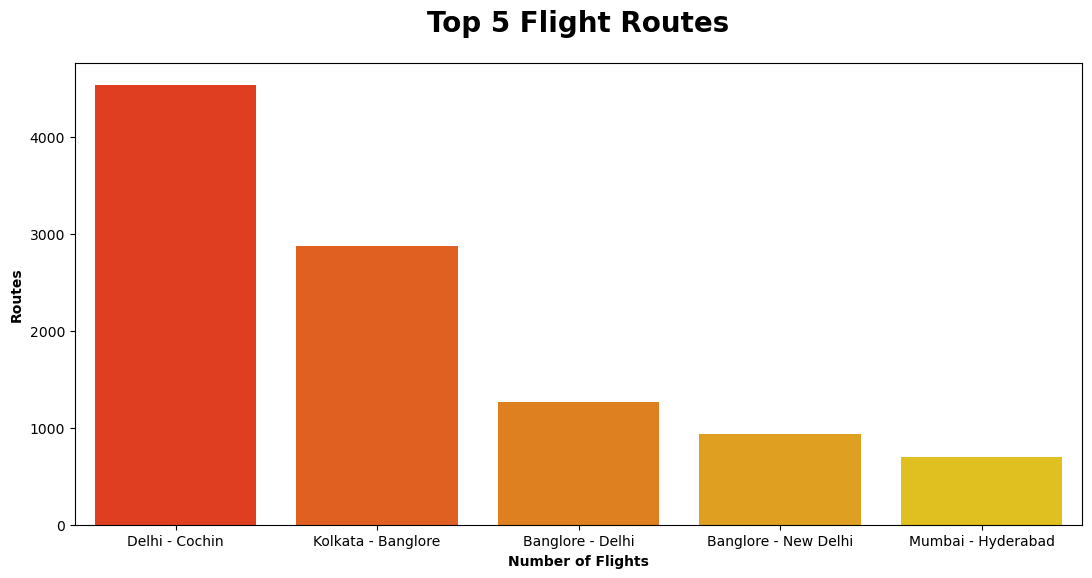

In [96]:
plt.figure(figsize=(13, 6))
sns.barplot(data=top_routes, x="Route", y="Flight_Count",palette="autumn")
plt.title("Top 5 Flight Routes",y=1.05,fontsize=20, fontweight="bold")
plt.xlabel("Number of Flights",fontsize=10,fontweight="bold")
plt.ylabel("Routes",fontsize=10,fontweight="bold")
plt.show()

### *Explanation*
* Creating a new column called Routes by combining "Source" and "Destination" in dataframe.
* Extracted top 5 routes with the most flights using the value_counts()method on Routes column and . head() function is used to get Top 5 Routes and reset_index () is used to get the results in dataframe.
* Used . rename() method to change the name of the count column to flight_count.
###  *The bar plot provides a visual representation  of these top routes, making it easier to compare the number of flights on each routes.*

## ***Impact of Additional Info:***

In [340]:
price_analysis=df.groupby("Additional_Info")[["Price"]].agg(["mean", "min", "max", "count"]).astype(int)
price_analysis

Price                    
                               mean    min    max count
Additional_Info                                        
1 Long layover                22109   7744  31825    19
1 Short layover               26743  26743  26743     1
2 Long layover                26480  26480  26480     1
Business class                56811  28097  79512     4
Change airports               16800  13366  26092     7
In-flight meal not included    9471   1840  19644  1982
No Info                        8044   7917   8153     3
No check-in baggage included   3645   1965   6356   320
No info                        9141   1759  54826  8345
Red-eye flight                10873  10873  10873     1

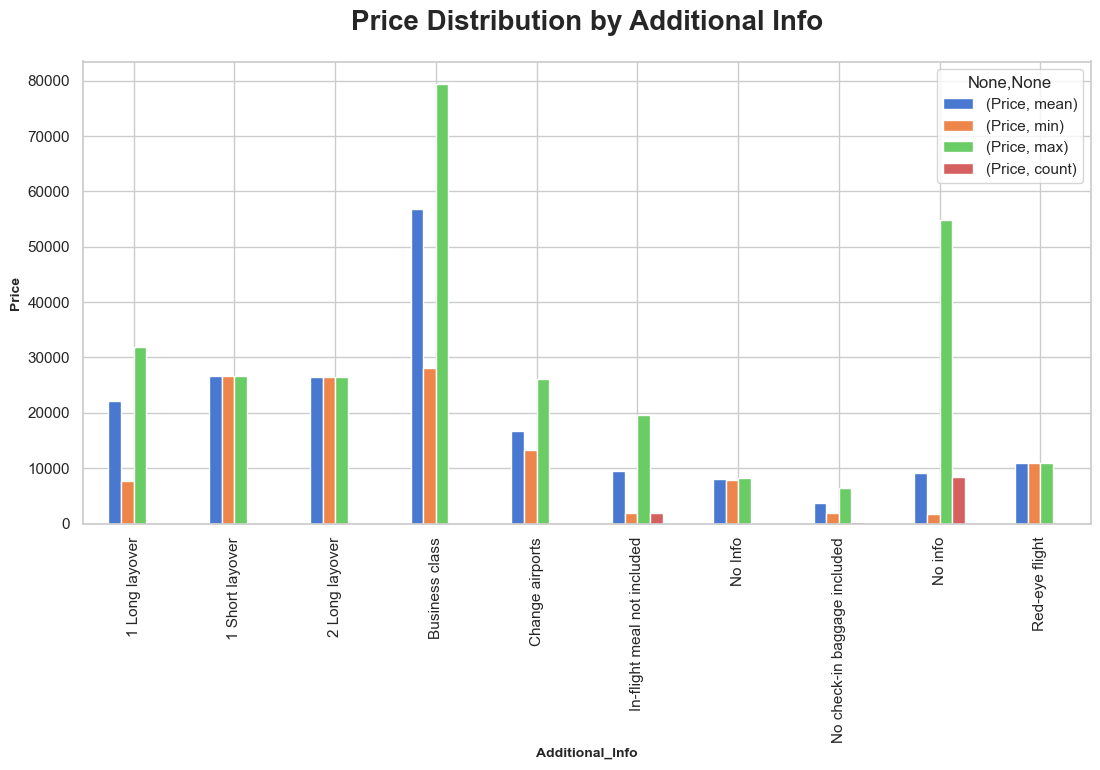

In [751]:
price_analysis.plot(kind="bar",figsize=(13, 6))
plt.title("Price Distribution by Additional Info",y=1.05,fontsize=20,fontweight="bold")
plt.xlabel("Additional_Info",fontsize=10,fontweight="bold")
plt.ylabel("Price",fontsize=10,fontweight="bold")
plt.show()

### *Explanation*
* Grouped the Additional_Info column with price to get minimum , maximum,average and count of prices for each group and converted the the data into integer by using .astype() function.
* From the visual representation:-
* the maximum  prices is observed for "Business Class" indicating business class tend to be the most expensive
### *The chart can be used to inform decision- making and optimaizing flight booking stratergies.*

## ***Interesting Fact:***

In [717]:
Analyze_Price_by_TotalStops=df.groupby("Total_Stops")[["Price"]].agg(["max","min","count","mean"])
Analyze_Price_by_TotalStops

Price                             
                 max      min count          mean
Total_Stops                                      
1 stop       79512.0   3480.0  5625  10594.123556
2 stops      52285.0   4647.0  1520  12715.807895
3 stops      21829.0   8607.0    45  13112.000000
4 stops      17686.0  17686.0     1  17686.000000
non-stop     31945.0   1759.0  3491   5024.900315

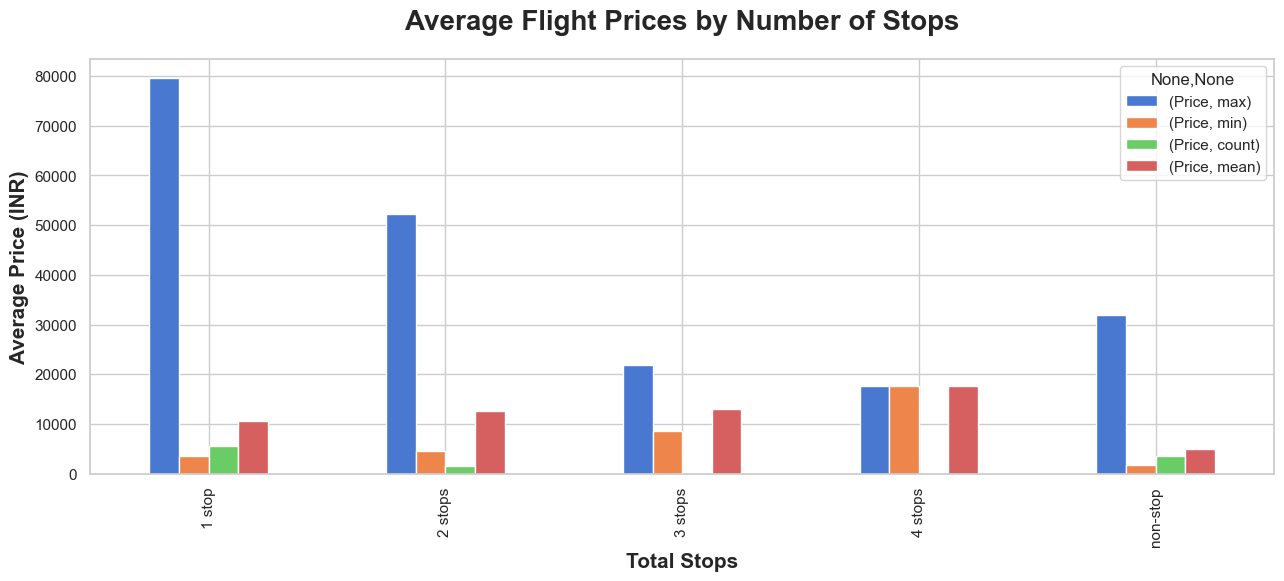

In [719]:
Analyze_Price_by_TotalStops.plot(kind="bar",figsize=(13, 6))
plt.title("Average Flight Prices by Number of Stops",y=1.05,fontsize=20,fontweight="bold")
plt.xlabel("Total Stops",fontsize=15,fontweight="bold")
plt.ylabel("Average Price (INR)",fontsize=15,fontweight="bold")
plt.tight_layout()
plt.show()

#### **Find the cheapest non-stop flight**

In [758]:
cheapest_non_stop_flight = df[df["Total_Stops"] == "non-stop"].sort_values(by="Price").head(1)
cheapest_non_stop_flight[["Airline", "Source", "Destination", "Price"]]

,Airline,Source,Destination,Price
4274,SpiceJet,Mumbai,Hyderabad,1759.0


### *Explanation*
*  grouped the Total_Stops column with price and stored in variable Analyze_Price_by_TotalStops
* The bar chart visually confirms that trends observed in table: Average flight prices generally increases with the number of stops, with non-stops flights being the most expensive.isualization makes easier for the travellors to compare the average price across different numbers of stops at a glance.
* Filters the Total_Stops columns to get only that rows with  flights which fly non-stop  then sorted the values by price to get the cheapest flight which is non-stop and stored in variable cheapest_non_stop_flight.
### *This kind of analysis helps travelers find the cheapest non-stop flights by analyzing the flight data, providing essential details such as airline,source ,destination and price, making it easier to plan their trip.*
